In [ ]:
# Creates an animated contact sheet of avg. morphed cells across map points

In [1]:
!pwd
!date

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/MovieALPBaseline
Sun Jun 26 01:09:09 PDT 2022


In [2]:
import os
import sys
import json
import importlib
import concurrent
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

sys.path.insert(1, '../tools')
import common

In [3]:
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
control = controller.Controller(general.load_config_file(path_config))
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [4]:
device = io.LocalStagingIO(control)
df = device.load_step_manifest("preprocessing")
space = shapespace.ShapeSpace(control)
space.execute(df)

In [5]:
variables = control.get_variables_values_for_aggregation()
df_agg = shapespace.ShapeSpaceBasic(control).get_aggregated_df(variables)
df_agg = df_agg.drop(columns=["structure"]).drop_duplicates().reset_index(drop=True)
df_agg.head()

shape_mode  mpId aggtype alias
0  NUC_MEM_PC1     1     avg   STR
1  NUC_MEM_PC1     2     avg   STR
2  NUC_MEM_PC1     3     avg   STR
3  NUC_MEM_PC1     4     avg   STR
4  NUC_MEM_PC1     5     avg   STR

In [6]:
shape_modes = control.get_shape_modes()
df_agg = df_agg.loc[df_agg.shape_mode.isin(shape_modes)]

In [7]:
def process_this_gene(gene):
    row_w_gene = row.copy()
    row_w_gene["structure"] = gene
    rep = device.read_agg_parameterized_intensity(row_w_gene)
    morphed = cytoparam.morph_representation_on_shape(
        img=domain,
        param_img_coords=coords_param,
        representation=rep
    )
    return np.stack([domain_nuc, domain_mem, morphed], axis=0)

In [37]:
genes = control.get_gene_names()

In [9]:
importlib.reload(common)

<module 'common' from '/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/MovieALPBaseline/../tools/common.py'>

In [10]:
morphs = {}
for index, row in tqdm(df_agg.iterrows(), total=len(df_agg)):
    domain, domain_nuc, domain_mem, coords_param = common.get_map_point_shape(control, device, row)
    with concurrent.futures.ProcessPoolExecutor(control.get_ncores()) as executor:
        morphed = list(tqdm(executor.map(process_this_gene, genes), total=len(genes), leave=False))
    for gid, gene in enumerate(genes):
        morphs[f"{row.shape_mode}_{row.mpId}_{gene}"] = morphed[gid]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [29]:
with open("contrast_V3_90OnValids.json", "r") as fj:
    contrast = json.load(fj)["contrast"]

  0%|          | 0/9 [00:00<?, ?it/s]

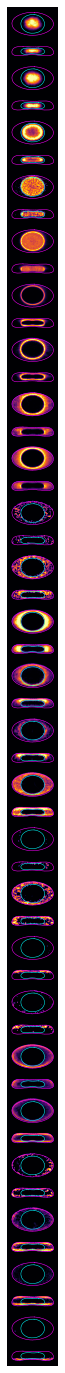

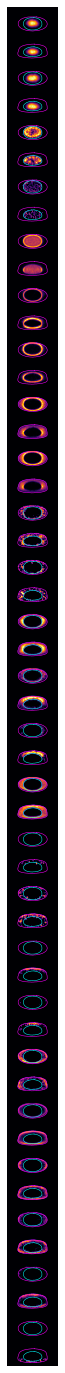

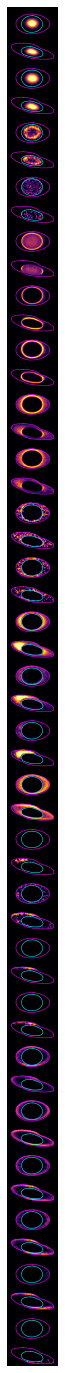

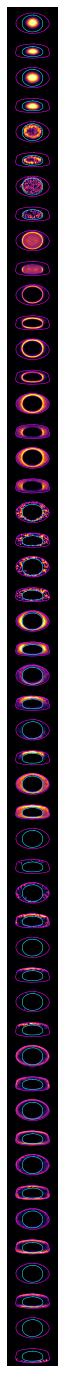

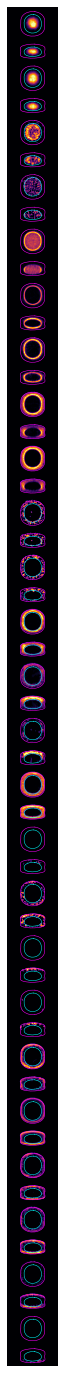

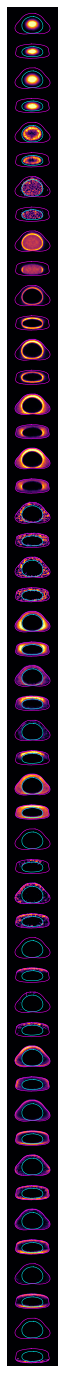

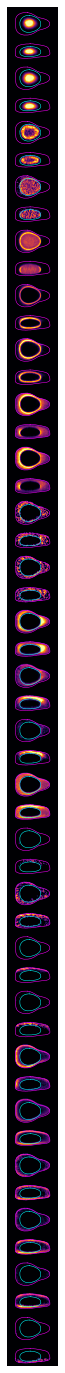

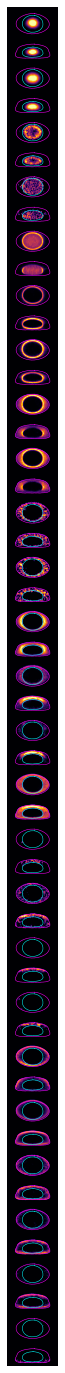

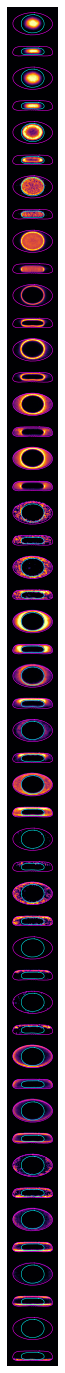

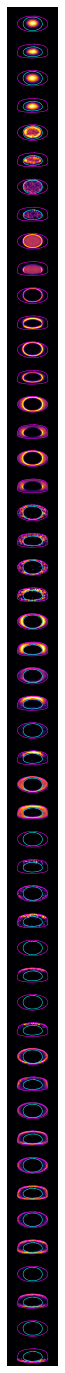

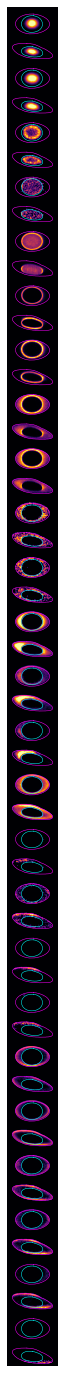

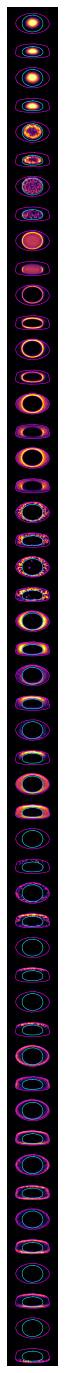

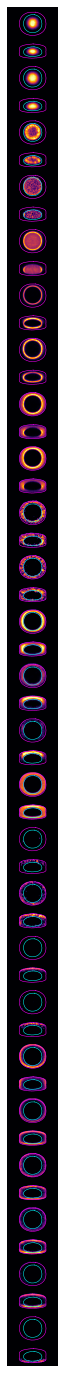

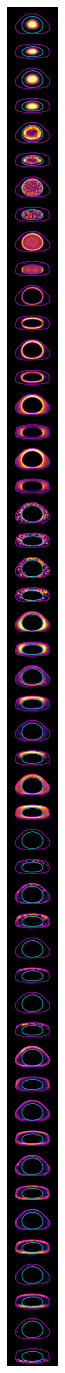

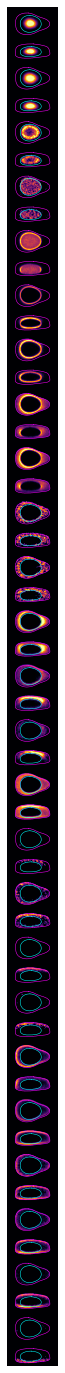

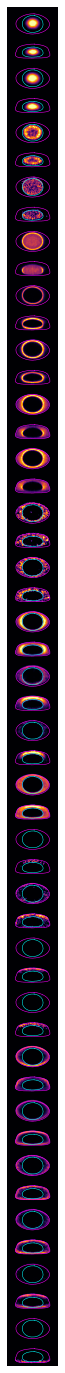

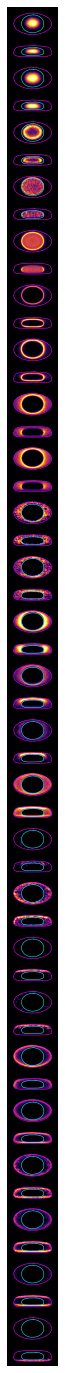

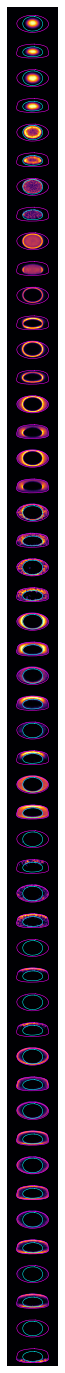

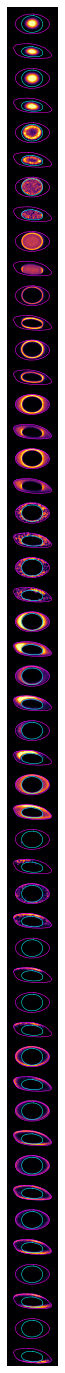

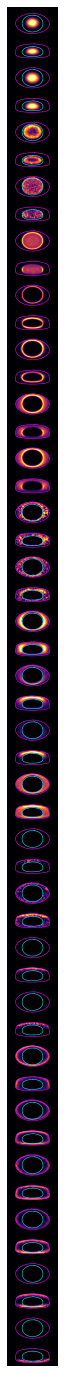

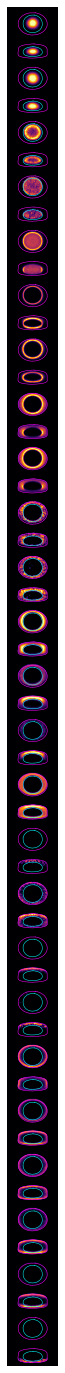

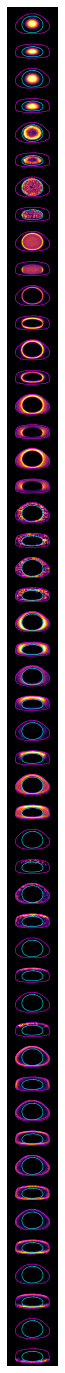

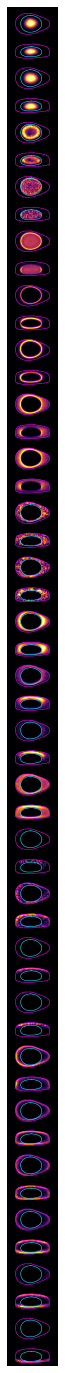

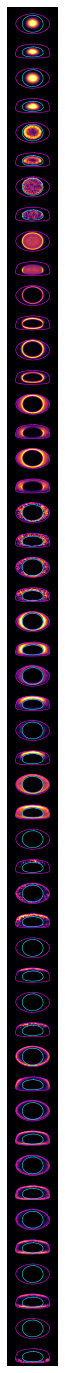

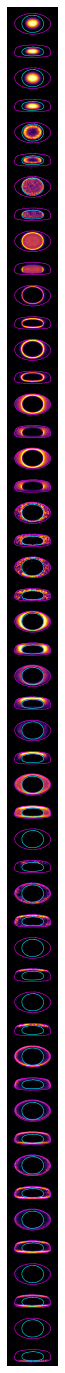

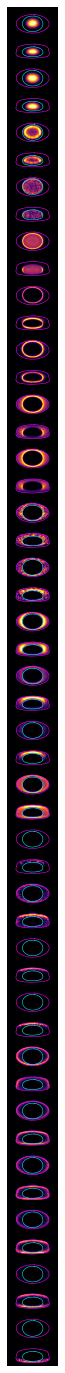

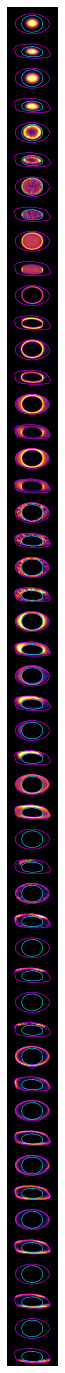

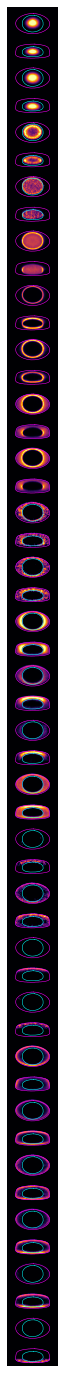

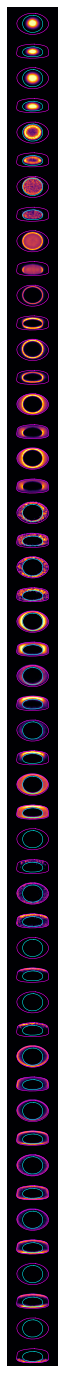

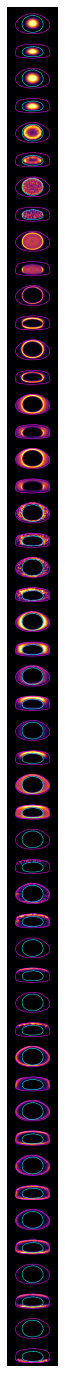

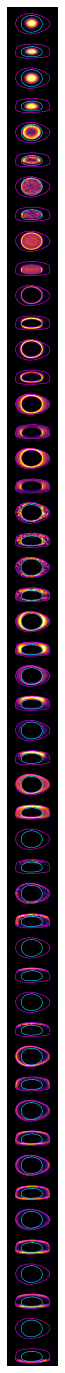

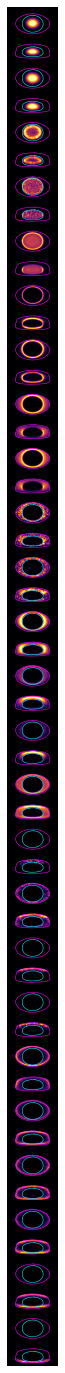

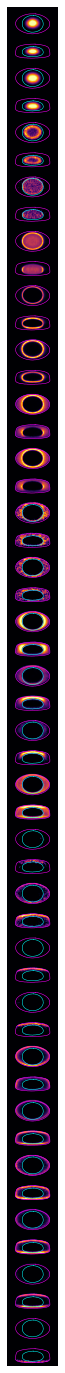

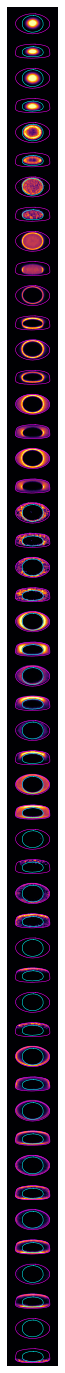

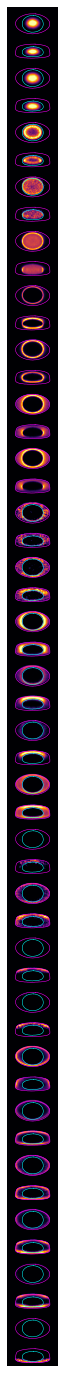

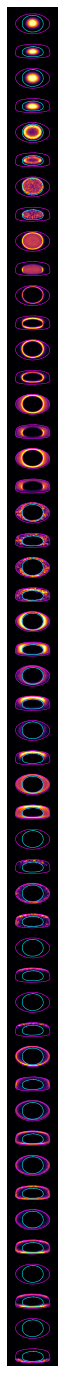

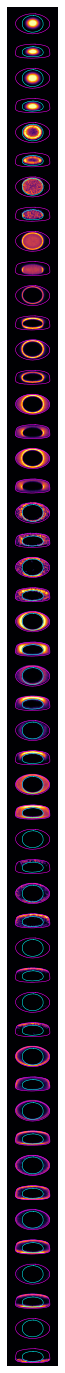

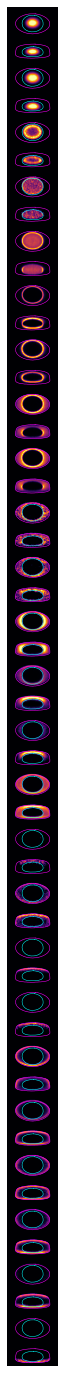

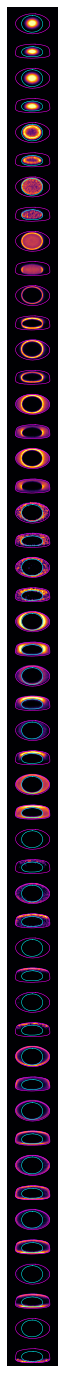

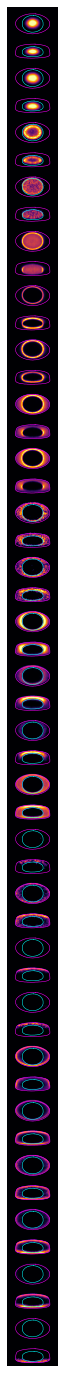

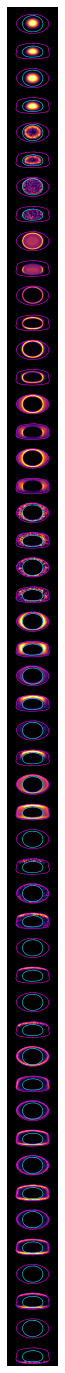

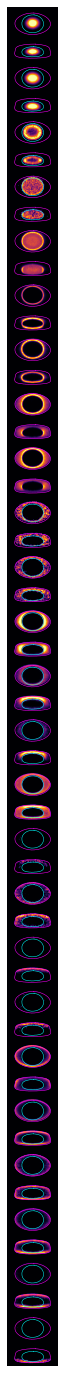

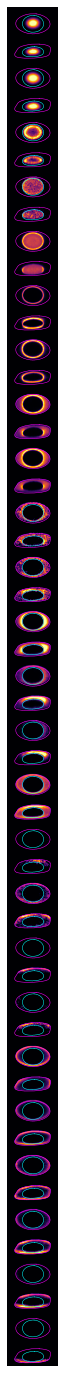

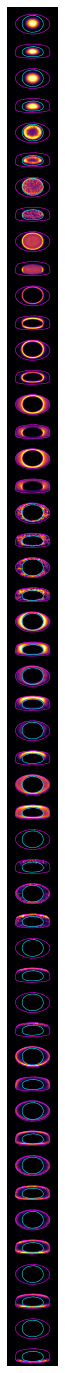

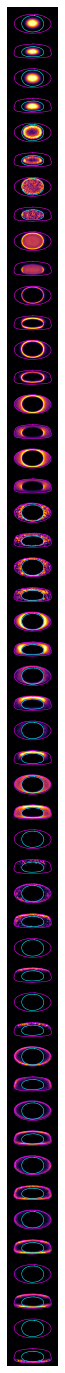

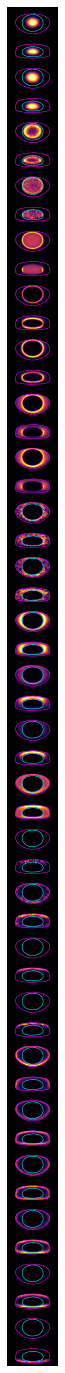

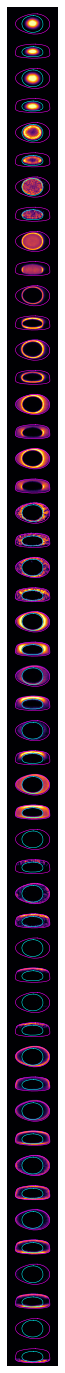

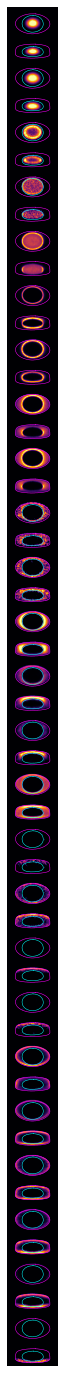

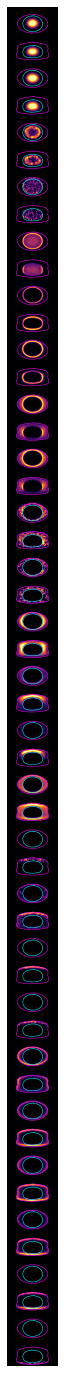

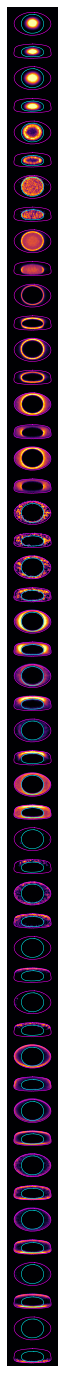

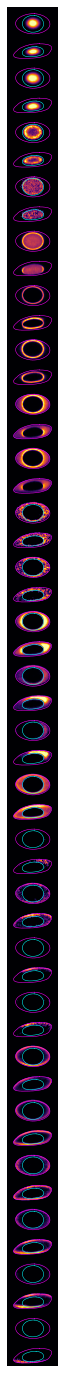

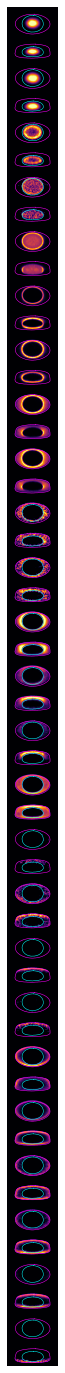

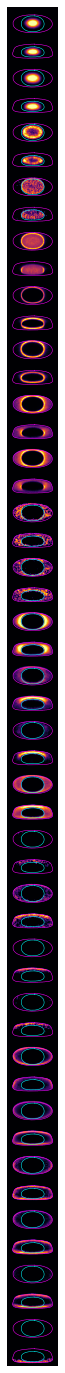

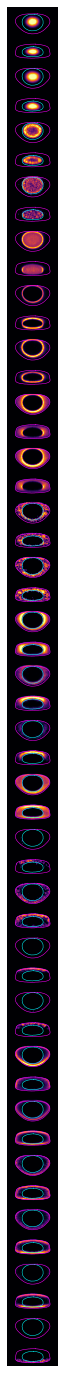

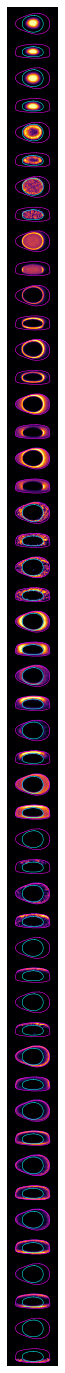

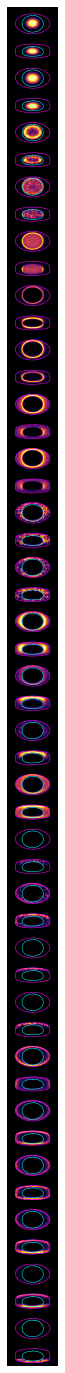

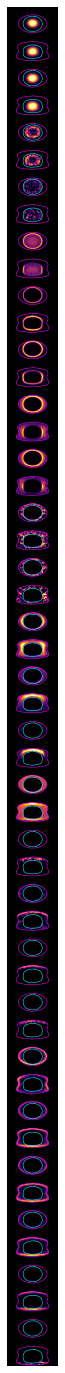

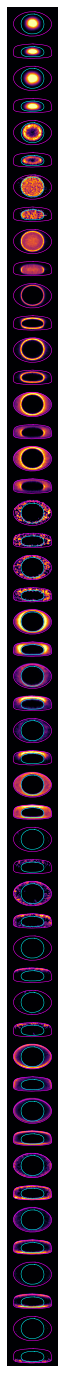

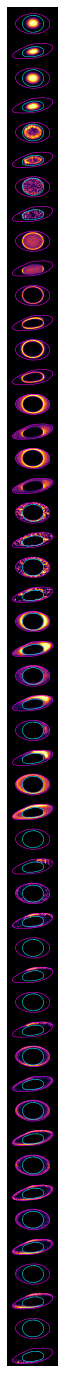

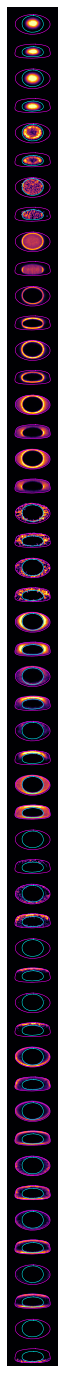

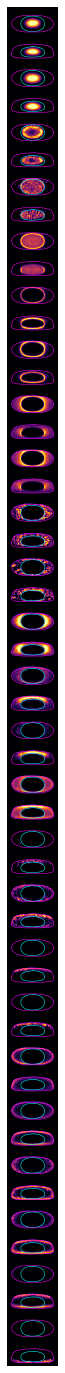

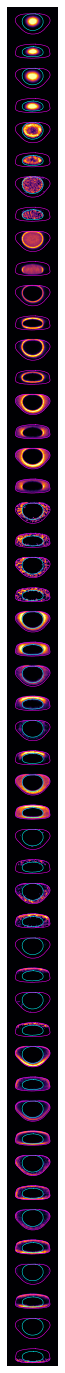

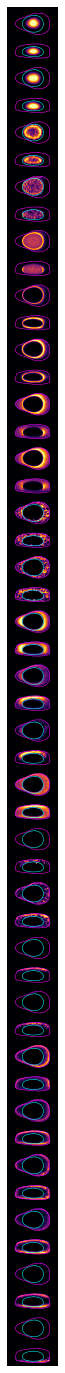

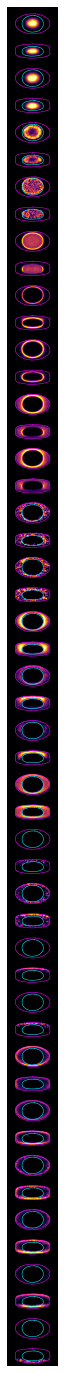

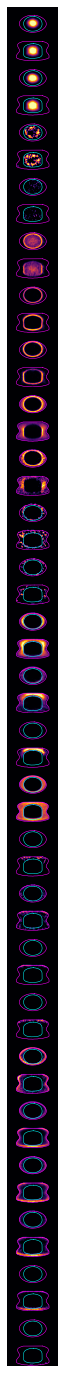

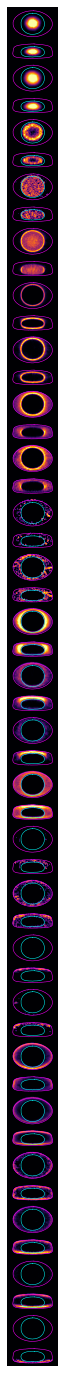

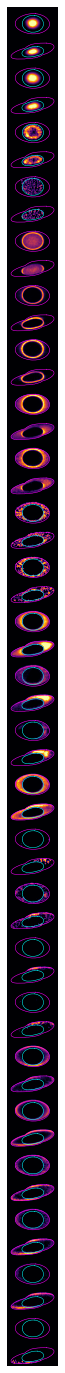

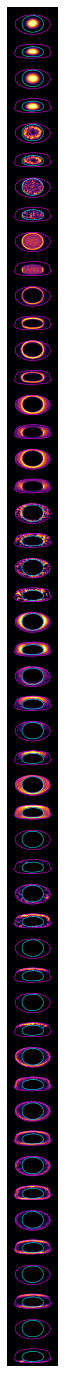

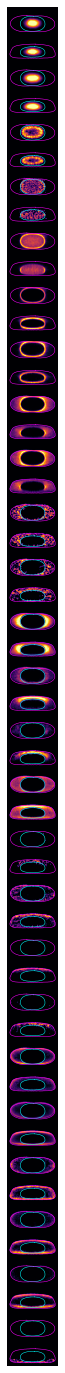

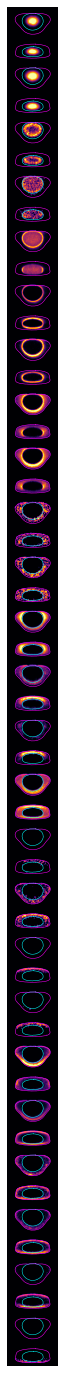

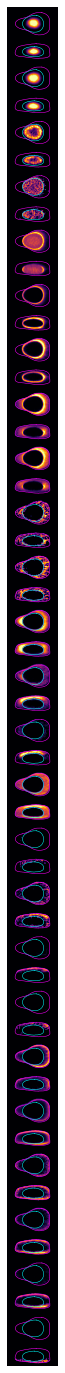

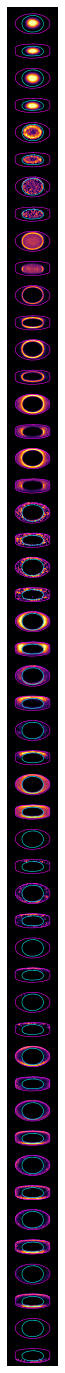

In [30]:
bbox=300

for mpId in tqdm(control.get_map_point_indexes()):
    for sm in control.get_shape_modes():
        instances = dict([(gene, [{"CellId": "mean","img": morphs[f"{sm}_{mpId}_{gene}"]}]) for gene in genes])
        common.make_contact_sheet_avgseg_channel(
            data = instances,
            bbox = bbox,
            contrast = contrast,
            file_prefix = f"MovieALPBaseline_{sm}_{mpId}.png",
            ylow = 90,
            zlow = 50,
            nucleus_contour_off = ["LMNB1", "NUP153", "SEC61B", "ATP2A2", "HIST1H2BJ"]
        )

In [99]:
mpId = 9
for sm in control.get_shape_modes():
    for gene in genes:
        space.set_active_shape_mode(sm, digitize=True)
        space.set_active_map_point_index(mpId)
        CellIds = space.get_active_cellids()
        df_bin = df.loc[CellIds]
        n = len(df_bin.loc[df_bin.structure_name==gene])
        print(f"n = {n}")
    print("--")

n = 502
n = 424
n = 7
n = 6
n = 133
n = 109
n = 309
n = 511
n = 17
n = 29
n = 20
n = 759
n = 316
n = 216
n = 594
n = 334
n = 324
n = 273
n = 479
n = 63
n = 278
n = 499
n = 285
n = 175
n = 23
--
n = 416
n = 617
n = 103
n = 80
n = 309
n = 574
n = 408
n = 391
n = 105
n = 18
n = 86
n = 1255
n = 569
n = 425
n = 506
n = 372
n = 311
n = 280
n = 440
n = 531
n = 313
n = 111
n = 466
n = 441
n = 262
--
n = 518
n = 622
n = 60
n = 31
n = 530
n = 242
n = 580
n = 358
n = 109
n = 79
n = 74
n = 872
n = 353
n = 255
n = 332
n = 330
n = 262
n = 288
n = 579
n = 189
n = 324
n = 223
n = 334
n = 208
n = 100
--
n = 428
n = 590
n = 51
n = 55
n = 499
n = 289
n = 649
n = 317
n = 263
n = 89
n = 77
n = 1018
n = 389
n = 298
n = 374
n = 279
n = 233
n = 280
n = 550
n = 186
n = 350
n = 159
n = 339
n = 237
n = 86
--
n = 508
n = 684
n = 93
n = 78
n = 544
n = 510
n = 684
n = 365
n = 312
n = 78
n = 100
n = 1205
n = 527
n = 341
n = 437
n = 385
n = 338
n = 295
n = 539
n = 361
n = 432
n = 148
n = 464
n = 334
n = 192
--
n = 38

In [31]:
common.now("complete")

complete 2022-06-26 11:28:55
